In [0]:
from torchvision import models, datasets, transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt
import numpy as np
from fastprogress import progress_bar as pb
import torch.nn.functional as F

In [3]:
vgg_net = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [01:10<00:00, 7.80MB/s]


In [4]:
for name, param in vgg_net.named_parameters():
    print(f'{name} : {param.requires_grad}')

features.0.weight : True
features.0.bias : True
features.2.weight : True
features.2.bias : True
features.5.weight : True
features.5.bias : True
features.7.weight : True
features.7.bias : True
features.10.weight : True
features.10.bias : True
features.12.weight : True
features.12.bias : True
features.14.weight : True
features.14.bias : True
features.17.weight : True
features.17.bias : True
features.19.weight : True
features.19.bias : True
features.21.weight : True
features.21.bias : True
features.24.weight : True
features.24.bias : True
features.26.weight : True
features.26.bias : True
features.28.weight : True
features.28.bias : True
classifier.0.weight : True
classifier.0.bias : True
classifier.3.weight : True
classifier.3.bias : True
classifier.6.weight : True
classifier.6.bias : True


In [0]:
for name, param in vgg_net.named_parameters():
    param.requires_grad = False

In [6]:
for name, param in vgg_net.named_parameters():
    print(f'{name} : {param.requires_grad}')

features.0.weight : False
features.0.bias : False
features.2.weight : False
features.2.bias : False
features.5.weight : False
features.5.bias : False
features.7.weight : False
features.7.bias : False
features.10.weight : False
features.10.bias : False
features.12.weight : False
features.12.bias : False
features.14.weight : False
features.14.bias : False
features.17.weight : False
features.17.bias : False
features.19.weight : False
features.19.bias : False
features.21.weight : False
features.21.bias : False
features.24.weight : False
features.24.bias : False
features.26.weight : False
features.26.bias : False
features.28.weight : False
features.28.bias : False
classifier.0.weight : False
classifier.0.bias : False
classifier.3.weight : False
classifier.3.bias : False
classifier.6.weight : False
classifier.6.bias : False


In [7]:
vgg_net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    normalize
])

transform_resize224 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

transform_resize = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [0]:
!rm -rf ./data

In [10]:
datasets.ImageNet

torchvision.datasets.imagenet.ImageNet

In [11]:
train_set = datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)

0it [00:00, ?it/s]

169009152it [00:02, 74214034.80it/s]                               


Extracting ./data/cifar-100-python.tar.gz to ./data


In [12]:
test_set = datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified


In [98]:
train_set = datasets.ImageNet(root='./data_imagenet', train=True, transform=transform, download=True)
test_set = datasets.ImageNet(root='./data_imagenet', train=False, transform=transform, download=True)

0it [00:00, ?it/s]

HTTPError: ignored

In [0]:
batch_size = 50

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)

In [0]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)

In [0]:
batch = next(iter(train_loader))

In [17]:
len(batch[1])

50

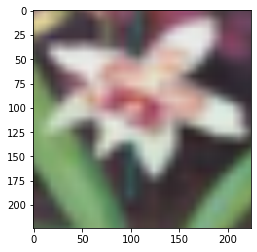

In [97]:
plt.imshow(batch[0][10].permute(1, 2, 0))

In [0]:
res = vgg_net(batch[0])

In [66]:
res.shape

torch.Size([50, 1000])

In [68]:
torch.argmax(res, axis=1)

tensor([675, 392, 353, 949,  26, 978,  51,  29, 772, 902, 680, 551, 335,   1,
        413, 556, 914, 763, 241, 556, 271, 135, 501, 946, 986,   5, 902, 902,
        103,  80, 559, 168,  73, 404, 653, 384, 426, 653, 111, 220, 902,  98,
         80, 976,   5, 743, 680,  62, 101, 241])

In [69]:
batch[1]

tensor([58, 23, 51, 83, 77, 71, 19, 50, 16, 18, 46, 61, 64, 82, 24, 87, 32, 99,
         3,  5, 97, 59, 68, 14, 51, 67, 48, 41, 27, 21, 20, 19, 45, 69, 37, 49,
        22, 48, 99, 66, 39, 27, 23, 71, 30, 17,  9, 26, 31, 66])

In [18]:
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

--2020-01-01 07:27:56--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.162.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.162.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.01s   

2020-01-01 07:27:56 (2.74 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]



In [0]:
import json

In [20]:
class_index = json.load(open('imagenet_class_index.json', 'r'))
print(class_index)

{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [21]:
class_index[str(675)]

['n03796401', 'moving_van']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03045698', 'cloak']


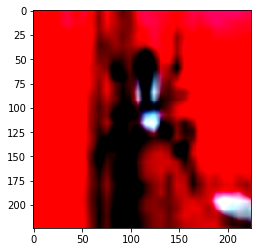

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02493793', 'spider_monkey']


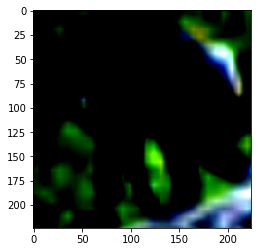

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02095314', 'wire-haired_fox_terrier']


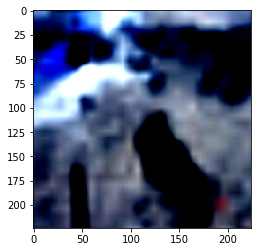

['n01739381', 'vine_snake']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


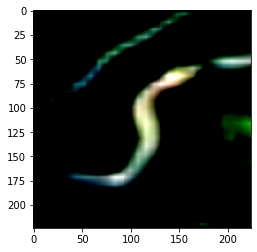

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03544143', 'hourglass']


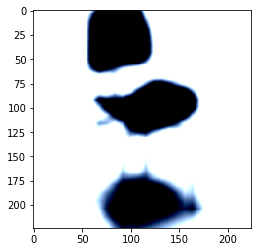

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03690938', 'lotion']


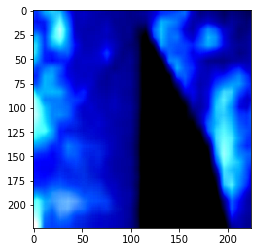

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03776460', 'mobile_home']


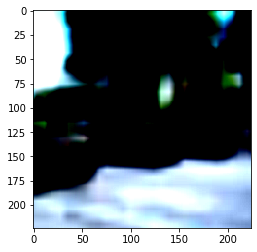

['n02356798', 'fox_squirrel']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


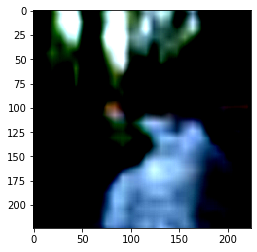

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02074367', 'dugong']


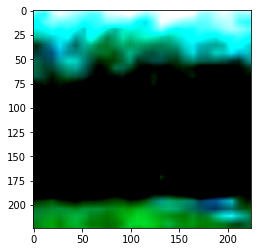

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n09399592', 'promontory']


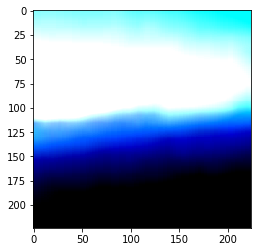

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04579432', 'whistle']


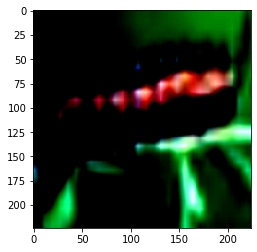

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04443257', 'tobacco_shop']


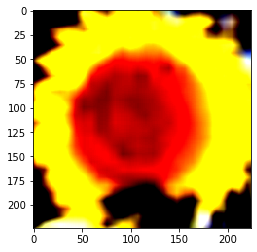

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04428191', 'thresher']


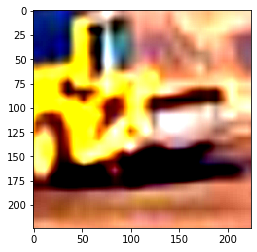

['n03825788', 'nipple']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


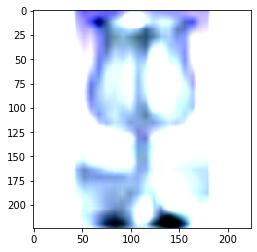

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02483708', 'siamang']


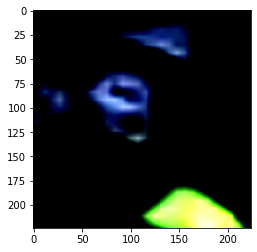

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03720891', 'maraca']


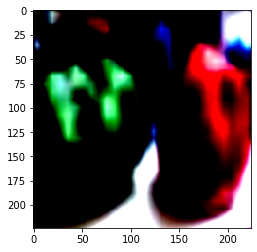

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02356798', 'fox_squirrel']


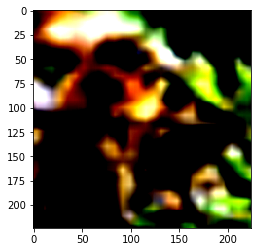

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03445777', 'golf_ball']


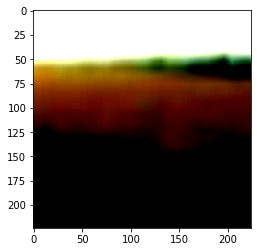

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02129165', 'lion']


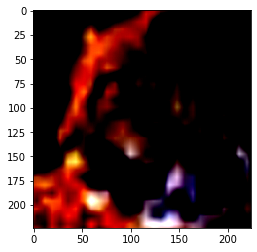

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02667093', 'abaya']


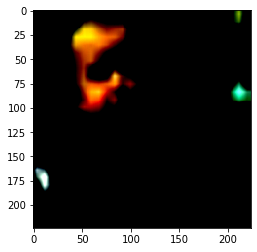

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n01855032', 'red-breasted_merganser']


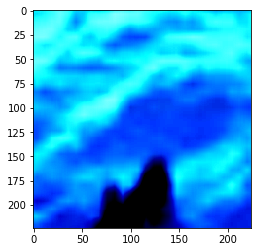

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n01632458', 'spotted_salamander']


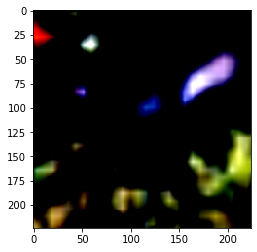

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04008634', 'projectile']


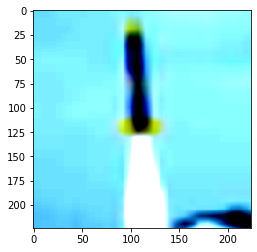

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04404412', 'television']


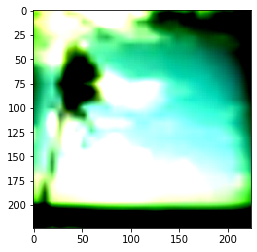

['n02089078', 'black-and-tan_coonhound']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


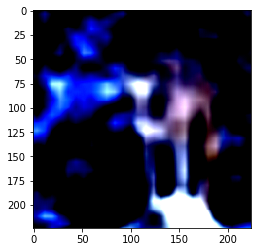

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02071294', 'killer_whale']


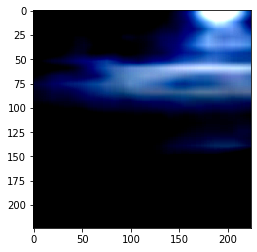

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04428191', 'thresher']


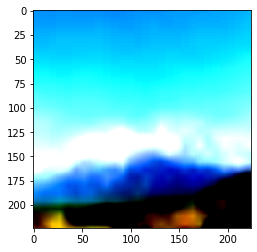

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04023962', 'punching_bag']


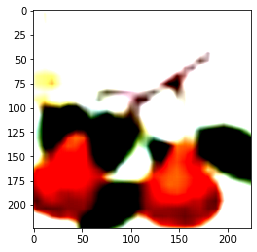

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02865351', 'bolo_tie']


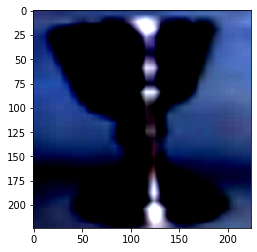

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04591157', 'Windsor_tie']


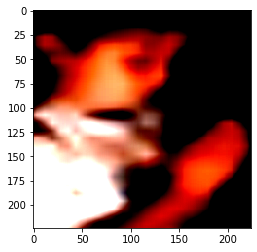

['n02823750', 'beer_glass']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


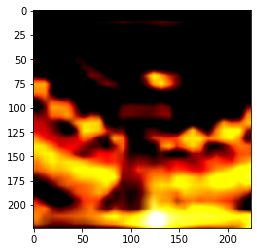

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02356798', 'fox_squirrel']


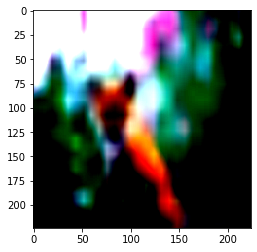

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02356798', 'fox_squirrel']


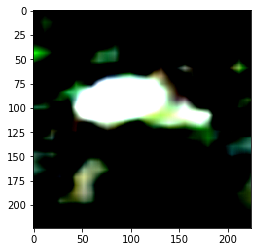

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n04429376', 'throne']


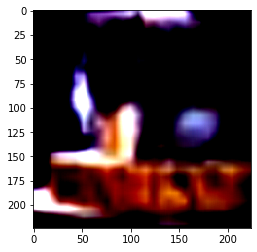

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02119789', 'kit_fox']


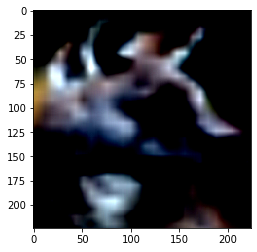

['n02606052', 'rock_beauty']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


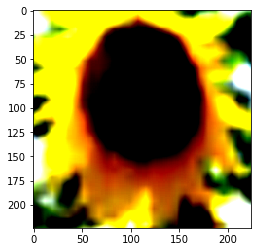

['n02865351', 'bolo_tie']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


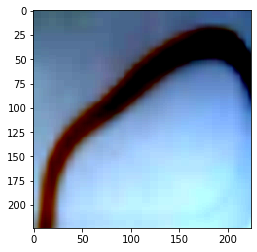

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03045698', 'cloak']


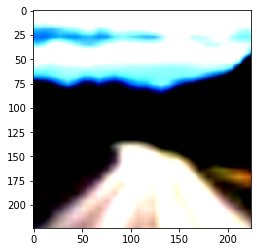

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n01704323', 'triceratops']


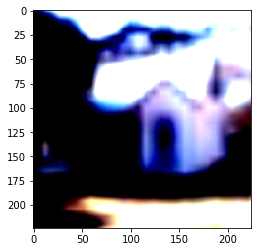

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n09288635', 'geyser']


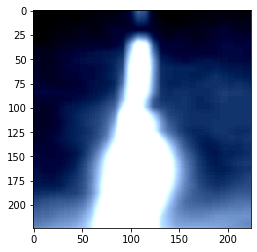

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n01990800', 'isopod']


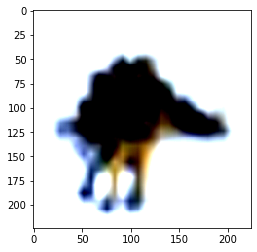

['n02074367', 'dugong']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


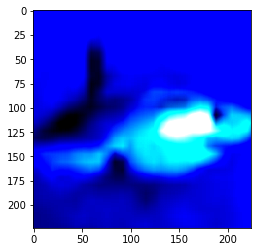

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n03903868', 'pedestal']


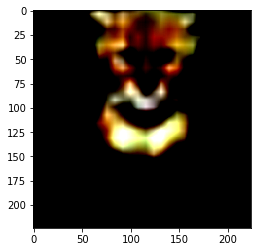

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02488291', 'langur']


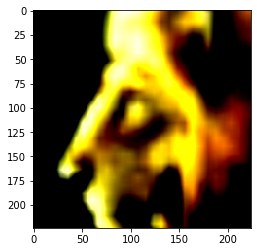

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n01843065', 'jacamar']


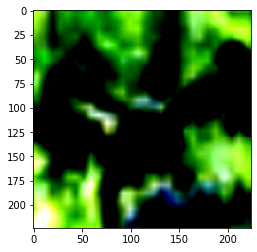

['n04443257', 'tobacco_shop']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


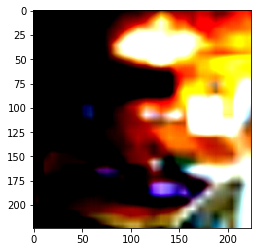

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n02794156', 'barometer']


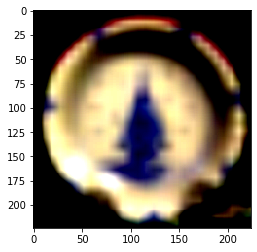

['n02134418', 'sloth_bear']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


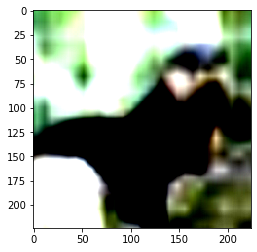

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n12057211', "yellow_lady's_slipper"]


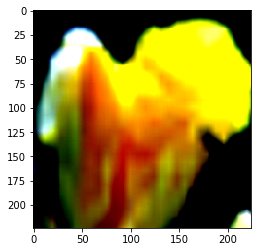

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['n07730033', 'cardoon']


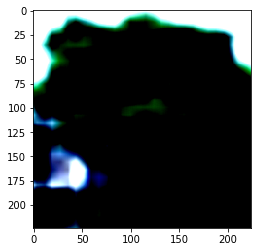

In [85]:
for i in range(50):
    cls = torch.argmax(res, axis=1)[i]
    print(class_index[str(int(cls))])
    plt.imshow(batch[0][i].permute(1, 2, 0))
    plt.show()

In [22]:
!wget https://www.misterdonut.jp/m_menu/donut/img/pp_dpd01.jpg

--2020-01-01 07:27:58--  https://www.misterdonut.jp/m_menu/donut/img/pp_dpd01.jpg
Resolving www.misterdonut.jp (www.misterdonut.jp)... 161.202.123.249, 161.202.123.247
Connecting to www.misterdonut.jp (www.misterdonut.jp)|161.202.123.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21425 (21K) [image/jpeg]
Saving to: ‘pp_dpd01.jpg’

pp_dpd01.jpg        100%[===================>]  20.92K  --.-KB/s    in 0s      

2020-01-01 07:27:59 (185 MB/s) - ‘pp_dpd01.jpg’ saved [21425/21425]



In [0]:
img_pondeling = Image.open('pp_dpd01.jpg')

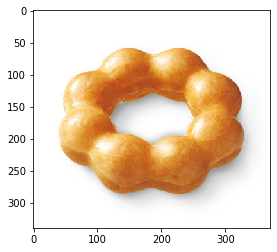

In [24]:
plt.imshow(img_pondeling)

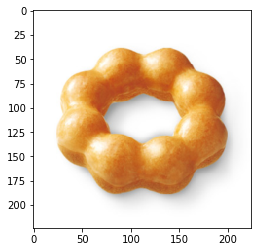

In [25]:
plt.imshow(transform_resize224(img_pondeling).permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


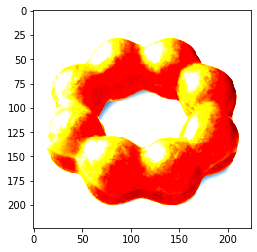

In [26]:
plt.imshow(transform(img_pondeling).permute(1, 2, 0))

In [26]:
torch.argmax(vgg_net(transform(img_pondeling).unsqueeze_(0)[:, :3, :, :]), axis=1)

tensor([932])

In [27]:
class_index['932']

['n07695742', 'pretzel']

In [28]:
torch.argmax(vgg_net(transform_resize224(img_pondeling).unsqueeze_(0)[:, :3, :, :]), axis=1)

tensor([932])

### ↑のポンデリングを生成するGenerator

In [0]:
import torch.nn as nn

In [0]:
class Generator(nn.Module):

    def __init__(self, in_channel=3, base_channel=124, latent_dim=100):
        super(Generator, self).__init__()

        self._in_channel = in_channel
        self._base_channel = base_channel
        self._latent_dim = latent_dim

        self._layer = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, base_channel*8, kernel_size=4, stride=2),
            nn.BatchNorm2d(base_channel*8),
            nn.ReLU(),
            nn.ConvTranspose2d(base_channel*8, base_channel*4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(base_channel*4),
            nn.ReLU(),
            nn.ConvTranspose2d(base_channel*4, base_channel*2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(base_channel*2),
            nn.ReLU(),
            nn.ConvTranspose2d(base_channel*2, base_channel, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(base_channel),
            nn.ConvTranspose2d(base_channel, self._in_channel, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, z):
        z = self._layer(z)
        return z

In [0]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [0]:
g = Generator()

In [36]:
g.apply(weights_init)

Generator(
  (_layer): Sequential(
    (0): ConvTranspose2d(100, 992, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(992, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(992, 496, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(496, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(496, 248, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(248, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(248, 124, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ConvTranspose2d(124, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (12): Sigmoid()
  )
)

In [334]:
g(torch.randn(100).view(1, 100, 1, 1))

tensor([[[[0.4947, 0.4645, 0.5110,  ..., 0.5125, 0.5103, 0.5202],
          [0.5071, 0.4833, 0.5264,  ..., 0.5324, 0.5422, 0.5136],
          [0.4723, 0.3362, 0.5866,  ..., 0.4049, 0.4748, 0.4719],
          ...,
          [0.4956, 0.4434, 0.4947,  ..., 0.5388, 0.4984, 0.4840],
          [0.5312, 0.3557, 0.4832,  ..., 0.3572, 0.4098, 0.4856],
          [0.5234, 0.5437, 0.5381,  ..., 0.4807, 0.5436, 0.5343]],

         [[0.4993, 0.4735, 0.5072,  ..., 0.4741, 0.4912, 0.4961],
          [0.5903, 0.4176, 0.5513,  ..., 0.4797, 0.5366, 0.5309],
          [0.5131, 0.3938, 0.4705,  ..., 0.3910, 0.4992, 0.4256],
          ...,
          [0.5415, 0.4619, 0.5241,  ..., 0.4356, 0.5482, 0.5053],
          [0.5055, 0.4390, 0.4762,  ..., 0.4065, 0.4610, 0.4426],
          [0.5205, 0.5053, 0.4993,  ..., 0.5122, 0.5041, 0.4905]],

         [[0.5065, 0.4721, 0.5056,  ..., 0.4300, 0.5259, 0.5168],
          [0.4892, 0.4410, 0.4674,  ..., 0.5683, 0.5278, 0.4612],
          [0.5485, 0.5267, 0.5859,  ..., 0

In [335]:
g(torch.randn(100).view(1, 100, 1, 1)).shape

torch.Size([1, 3, 64, 64])

In [0]:
generated_img = g(torch.randn(100).view(1, 100, 1, 1))[0].permute(1, 2, 0).detach()

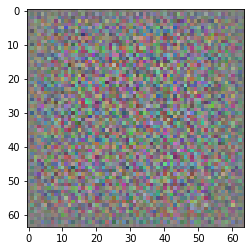

In [337]:
plt.imshow(generated_img)

In [338]:
transform(Image.fromarray(np.uint8(256*generated_img))).shape

torch.Size([3, 224, 224])

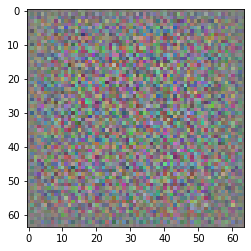

In [339]:
plt.imshow(transform_resize(Image.fromarray(np.uint8(256*generated_img))).permute(1, 2, 0))

In [0]:
criterion_mse = nn.MSELoss()
criterion_cross_entropy = nn.CrossEntropyLoss()

In [0]:
optimizer = torch.optim.Adam(g.parameters(), lr=0.001)

In [0]:
target_class = 10
batch_n = 30

In [347]:
resized_pondeling.view(1, 3, 64, 64).repeat(10, 1, 1, 1).shape

torch.Size([10, 3, 64, 64])

In [356]:
resized_pondeling = transform_resize(img_pondeling)
print(resized_pondeling.shape)
resized_pondeling_batch = resized_pondeling.view(1, 3, 64, 64).repeat(batch_n, 1, 1, 1)

loss_history = []

for i in pb(range(500)):
    gen_img = g(torch.randn(100*batch_n).view(batch_n, 100, 1, 1)) #.permute(1, 2, 0)

    # gen_img_resized = transform_resize(Image.fromarray(np.uint8(256*gen_img.detach())))
    # gen_img_resized.requires_grad = True
    # mse_loss = criterion_mse(gen_img_resized, resized_pondeling)
    mse_loss = criterion_mse(gen_img, resized_pondeling_batch)

    optimizer.zero_grad()

    mse_loss.backward()
    optimizer.step()

    loss_history.append(mse_loss.item())

torch.Size([3, 64, 64])


KeyboardInterrupt: ignored

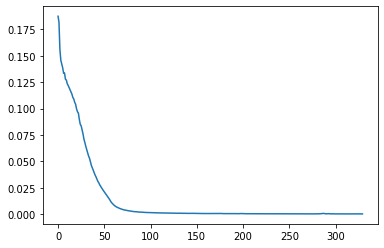

In [357]:
plt.plot(loss_history)

In [0]:
generated_img = g(torch.randn(100).view(1, 100, 1, 1))[0].permute(1, 2, 0).detach()

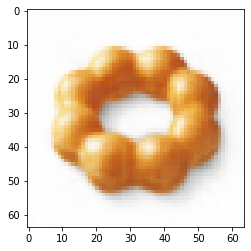

In [359]:
plt.imshow(transform_resize(Image.fromarray(np.uint8(256*generated_img))).permute(1, 2, 0))

### ↑のポンデリングに似ててかつVGGに任意のクラス(10)に識別させるような画像を生成するGenerator

In [0]:
g = Generator()

In [70]:
g.apply(weights_init)

Generator(
  (_layer): Sequential(
    (0): ConvTranspose2d(100, 992, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(992, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(992, 496, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(496, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(496, 248, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(248, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(248, 124, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ConvTranspose2d(124, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (12): Sigmoid()
  )
)

In [0]:
criterion_mse = nn.MSELoss()
criterion_cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(g.parameters(), lr=0.001)

In [0]:
target_class = 10
batch_n = 10

torch.Size([3, 64, 64])


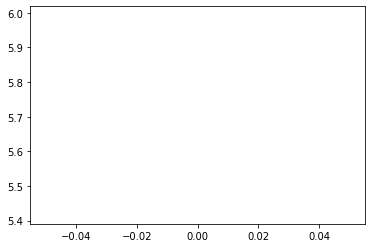

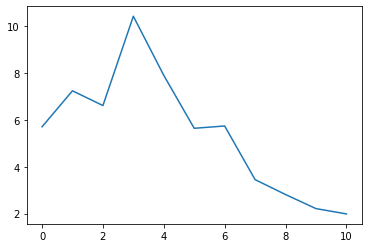

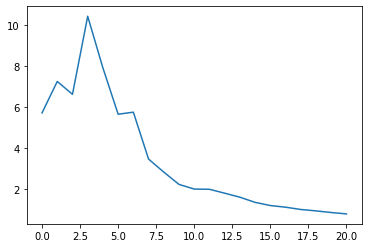

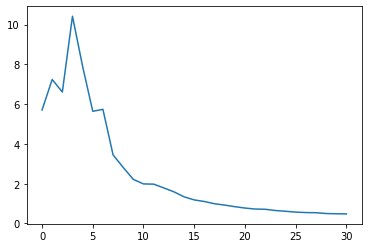

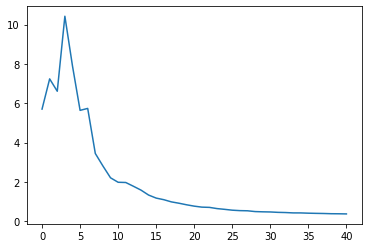

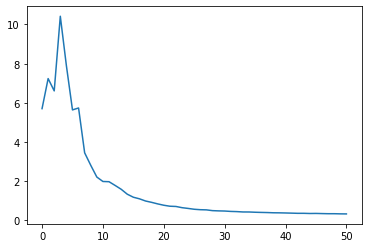

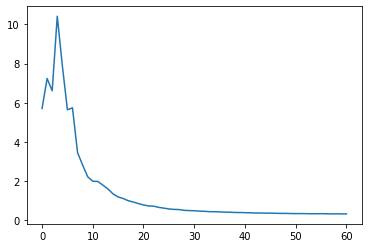

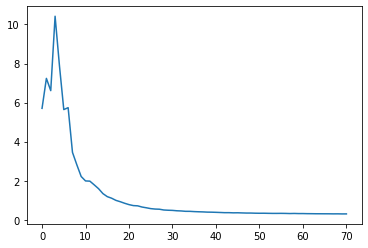

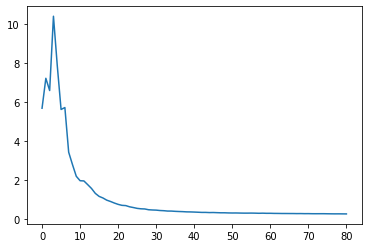

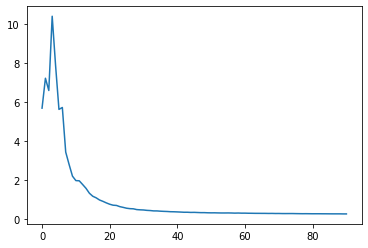

KeyboardInterrupt: ignored

In [73]:
resized_pondeling = transform_resize(img_pondeling)
print(resized_pondeling.shape)
resized_pondeling_batch = resized_pondeling.view(1, 3, 64, 64).repeat(batch_n, 1, 1, 1)

loss_history = []

for i in pb(range(200)):
    gen_img = g(torch.randn(100*batch_n).view(batch_n, 100, 1, 1))

    mse_loss = criterion_mse(gen_img, resized_pondeling_batch)

    pred = vgg_net(F.interpolate(gen_img, size=(224, 224)))
    target = torch.ones(batch_n).long() * target_class
    cross_entropy_loss = criterion_cross_entropy(pred, target)

    loss = mse_loss + cross_entropy_loss

    optimizer.zero_grad()
    loss.backward()
    # mse_loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if i % 10 == 0:
        plt.plot(loss_history)
        plt.show()

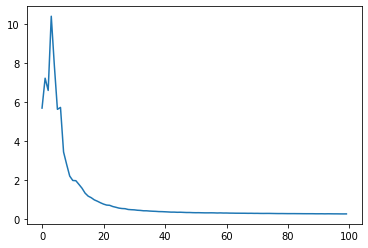

In [74]:
plt.plot(loss_history)

In [0]:
generated_img = g(torch.randn(100).view(1, 100, 1, 1))[0].permute(1, 2, 0).detach()

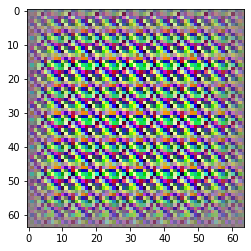

In [76]:
plt.imshow(transform_resize(Image.fromarray(np.uint8(256*generated_img))).permute(1, 2, 0))

In [80]:
torch.argmax(vgg_net(F.interpolate(g(torch.randn(100*10).view(10, 100, 1, 1)), size=(224, 224))), axis=1)

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [0]:
g = Generator()
g.apply(weights_init)

criterion_mse = nn.MSELoss()
criterion_cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(g.parameters(), lr=0.001)

In [0]:
target_class = 10
batch_n = 10

In [49]:
g.cuda()
vgg_net.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

torch.Size([3, 64, 64])


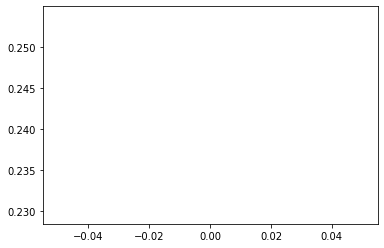

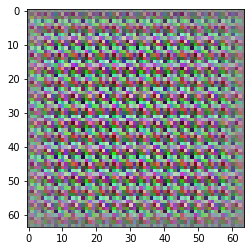

tensor([78, 78, 78, 78, 78, 78, 78, 78, 78, 78], device='cuda:0')


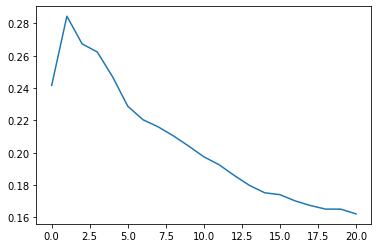

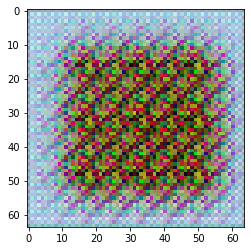

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


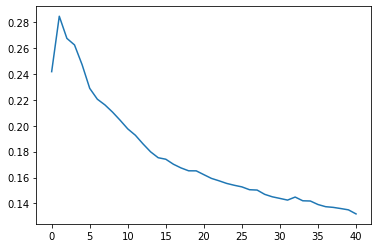

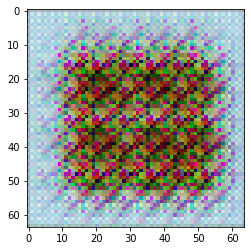

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


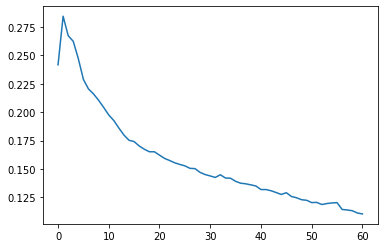

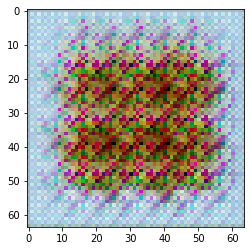

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


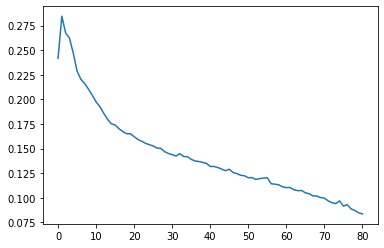

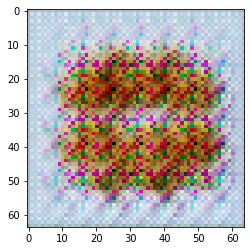

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


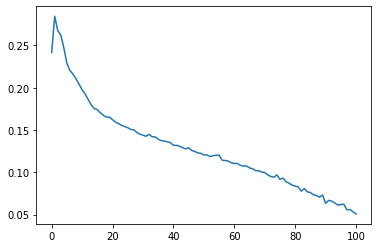

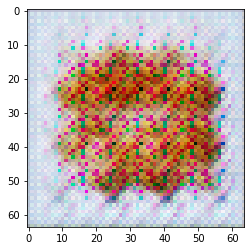

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


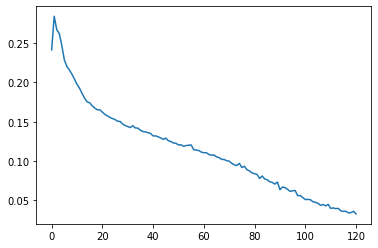

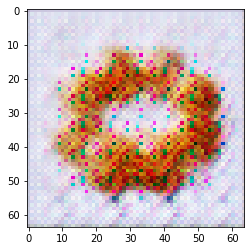

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


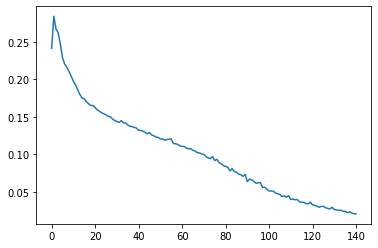

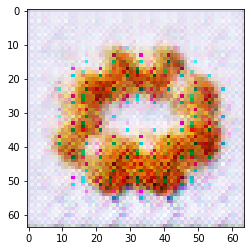

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


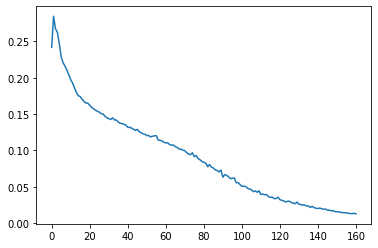

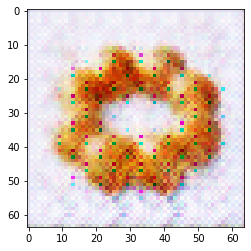

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


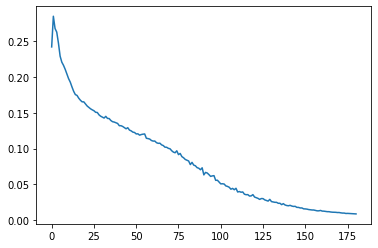

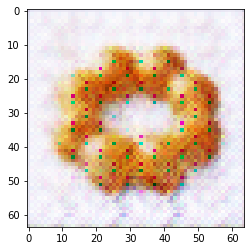

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


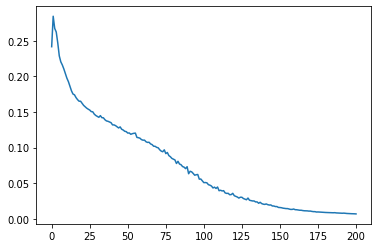

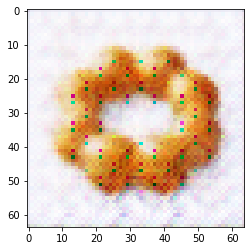

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


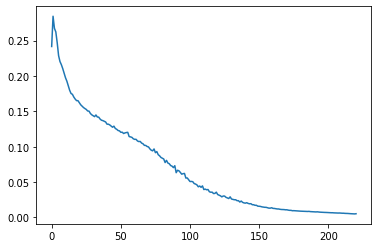

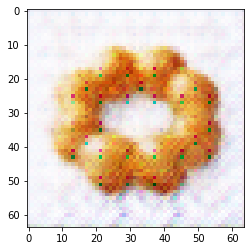

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


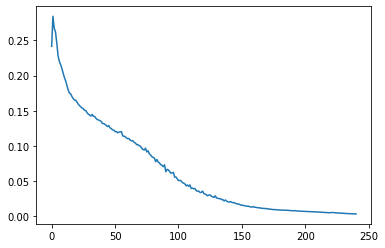

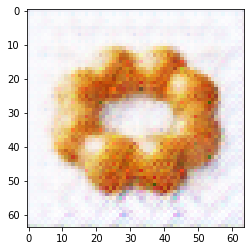

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


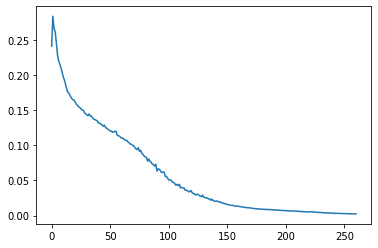

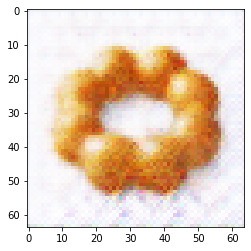

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


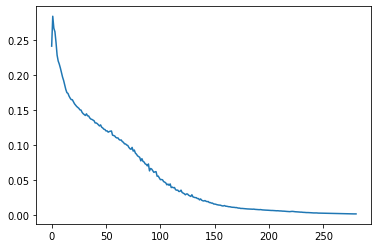

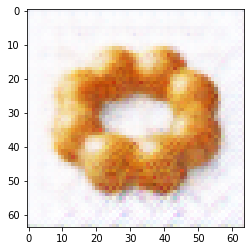

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


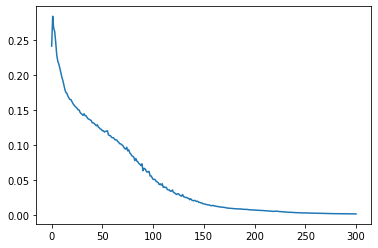

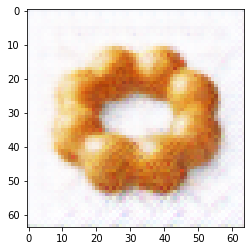

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


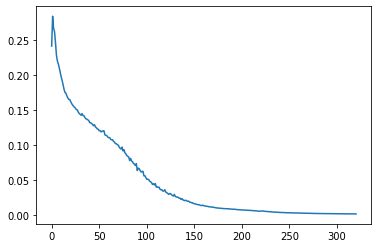

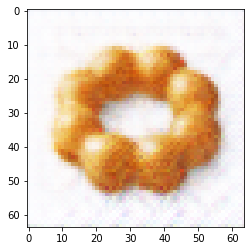

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


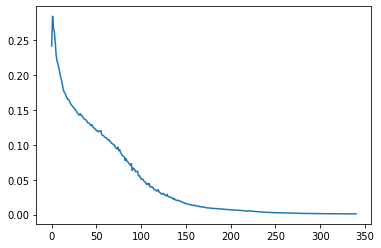

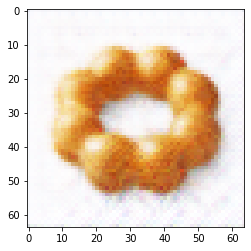

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


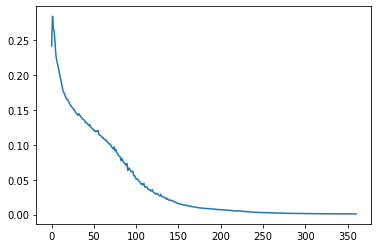

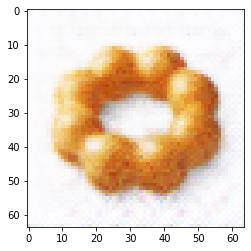

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')


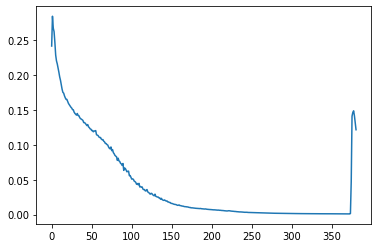

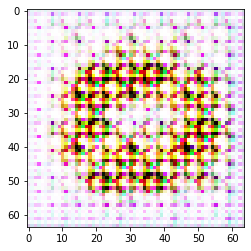

tensor([21, 21, 21, 21, 21, 21, 21, 21, 21, 21], device='cuda:0')


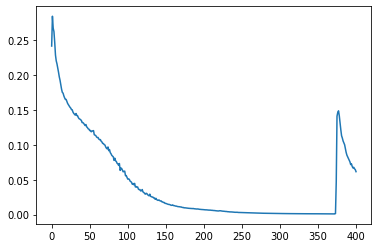

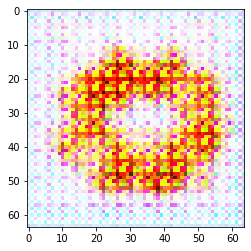

tensor([10, 11, 11, 11, 11, 11, 11, 11, 11, 10], device='cuda:0')


In [50]:
resized_pondeling = transform_resize(img_pondeling)
print(resized_pondeling.shape)
resized_pondeling_batch = resized_pondeling.view(1, 3, 64, 64).repeat(batch_n, 1, 1, 1)

loss_history = []

for i in pb(range(1000)):
    gen_img = g(torch.randn(100*batch_n).view(batch_n, 100, 1, 1).to('cuda'))

    mse_loss = criterion_mse(gen_img, resized_pondeling_batch.to('cuda'))

    pred = vgg_net(F.interpolate(gen_img, size=(224, 224)))
    target = torch.ones(batch_n).long() * target_class
    cross_entropy_loss = criterion_cross_entropy(pred, target.to('cuda'))

    loss = mse_loss + 0.01*cross_entropy_loss

    optimizer.zero_grad()
    loss.backward()
    # mse_loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if i % 20 == 0 and i <= 400:
        plt.plot(loss_history)
        plt.show()
        generated_img = g(torch.randn(100).view(1, 100, 1, 1).to('cuda'))[0].permute(1, 2, 0).cpu().detach()
        plt.imshow(transform_resize(Image.fromarray(np.uint8(256*generated_img))).permute(1, 2, 0))
        plt.show()

        print(torch.argmax(vgg_net(F.interpolate(g(torch.randn(100*10).view(10, 100, 1, 1).to('cuda')), size=(224, 224))), axis=1))

In [51]:
g.cpu()
vgg_net.cpu()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

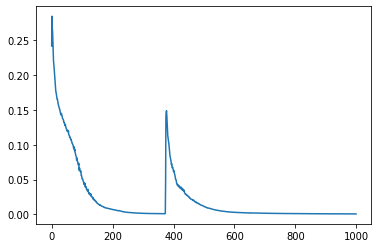

In [59]:
plt.plot(loss_history)

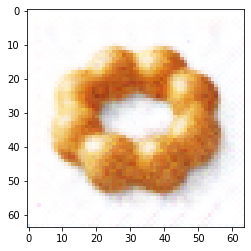

predicted class : tensor([10])


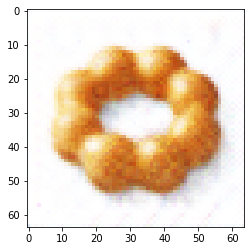

predicted class : tensor([10])


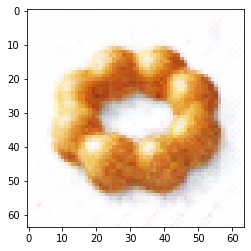

predicted class : tensor([10])


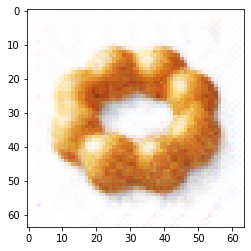

predicted class : tensor([10])


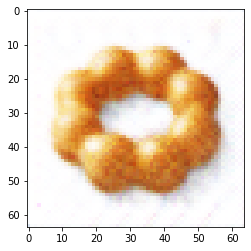

predicted class : tensor([10])


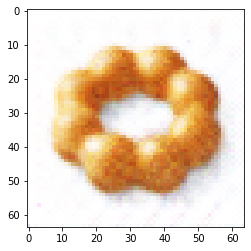

predicted class : tensor([10])


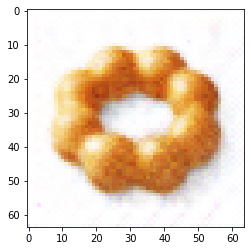

predicted class : tensor([10])


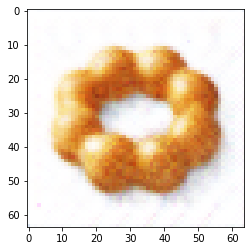

predicted class : tensor([10])


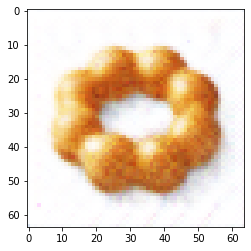

predicted class : tensor([10])


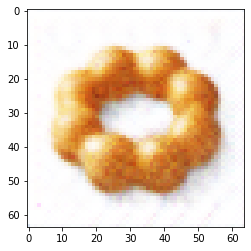

predicted class : tensor([10])


In [61]:
for i in range(10):
    generated_img = g(torch.randn(100).view(1, 100, 1, 1))
    plt.imshow(transform_resize(Image.fromarray(np.uint8(256*generated_img[0].permute(1, 2, 0).detach()))).permute(1, 2, 0))
    plt.show()
    pred_cls = torch.argmax(vgg_net(F.interpolate(generated_img, size=(224, 224))), axis=1)
    print(f'predicted class : {pred_cls}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15*(元画像 - 生成画像)


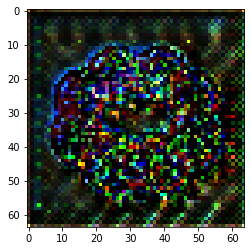

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


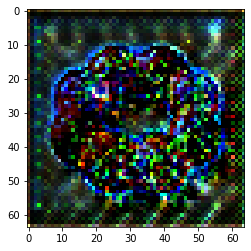

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


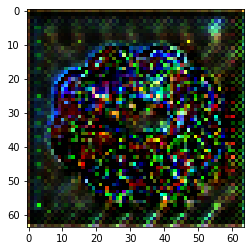

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


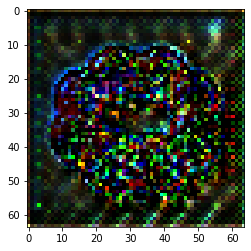

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


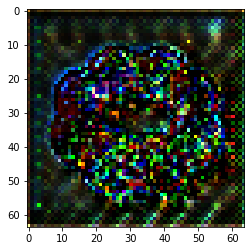

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


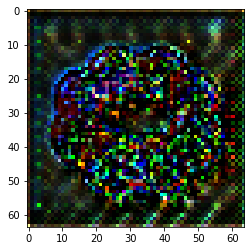

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


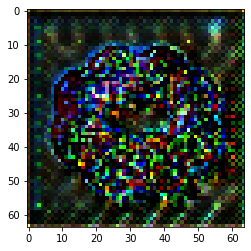

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


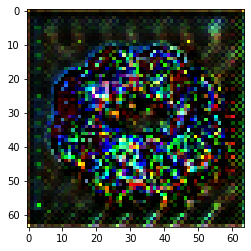

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


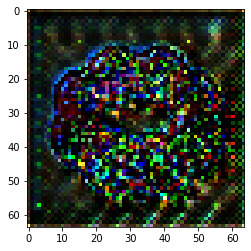

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted class : tensor([10])
15*(元画像 - 生成画像)


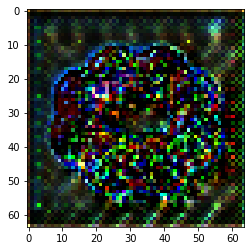

predicted class : tensor([10])


In [73]:
for i in range(10):
    generated_img = g(torch.randn(100).view(1, 100, 1, 1))
    print('15*(元画像 - 生成画像)')
    plt.imshow(15*(resized_pondeling - generated_img[0]).permute(1, 2, 0).detach())
    plt.show()
    pred_cls = torch.argmax(vgg_net(F.interpolate(generated_img, size=(224, 224))), axis=1)
    print(f'predicted class : {pred_cls}')